### Decision Tree Classifier in Sklearn

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  

In [2]:
data = pd.read_csv('TelcoChurn.csv')

---
Check the data types and if there are any missing values.  

In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---
Since this will transform the dataframe; I'm going to copy it. 

* customer ID doesn't appear to provide much value so it will be dropped.  
* TotalCharges should be numeric, but is coming in as an object.

In [5]:
x = data.drop(['customerID'], axis=1)

In [6]:
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerse')


In [7]:
x['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

---
Some of these variables have 2 levels, Churn Y/N, and some have multiple levels.  The get_dummies method will convert all non-numeric variables to binary.  The side effect of this is that it moves everything to a binary column.

So Churn Y/N becomes Churn_Y column and Churn_N column.  This may be more beneficial, but from what I've used so far, Churn can be encoded 0 or 1 in a single column and that is what I will do here. 

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
le.fit(['No', 'Yes'])

LabelEncoder()

In [11]:
x['Partner'] = le.transform(x['Partner'])
x['Dependents'] = le.transform(x['Dependents'])
x['PaperlessBilling'] = le.transform(x['PaperlessBilling'])
x['Churn'] = le.transform(x['Churn'])

In [12]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

---
Now that Churn is numeric, it can be set as our target.  Get_dummies now makes more sense as the variables previously encoded will be skipped.  We can also drop our target from our x data.

In [13]:
y = x['Churn'].values

In [14]:
x = pd.get_dummies(x)

In [15]:
x = x.drop(['Churn'], axis=1)

---
Getting close to the fun stuff... train_test_split makes it easy to create a training set and a test set.  

In [16]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [17]:
dTree = DecisionTreeClassifier(max_depth=5)

In [18]:
dTree.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

---
Apparently the to_numeric method created some nan's...this isn't good.  To get around it for now, the mean will take their place.

In [19]:
x.isnull().sum()

SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
gender_Female                               0
gender_Male                                 0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [20]:
x['TotalCharges'] = x['TotalCharges'].fillna(x['TotalCharges'].mean())

In [21]:
x['TotalCharges'].isnull().sum()

0

In [22]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [23]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
dot_data = StringIO()

In [25]:
export_graphviz(dTree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

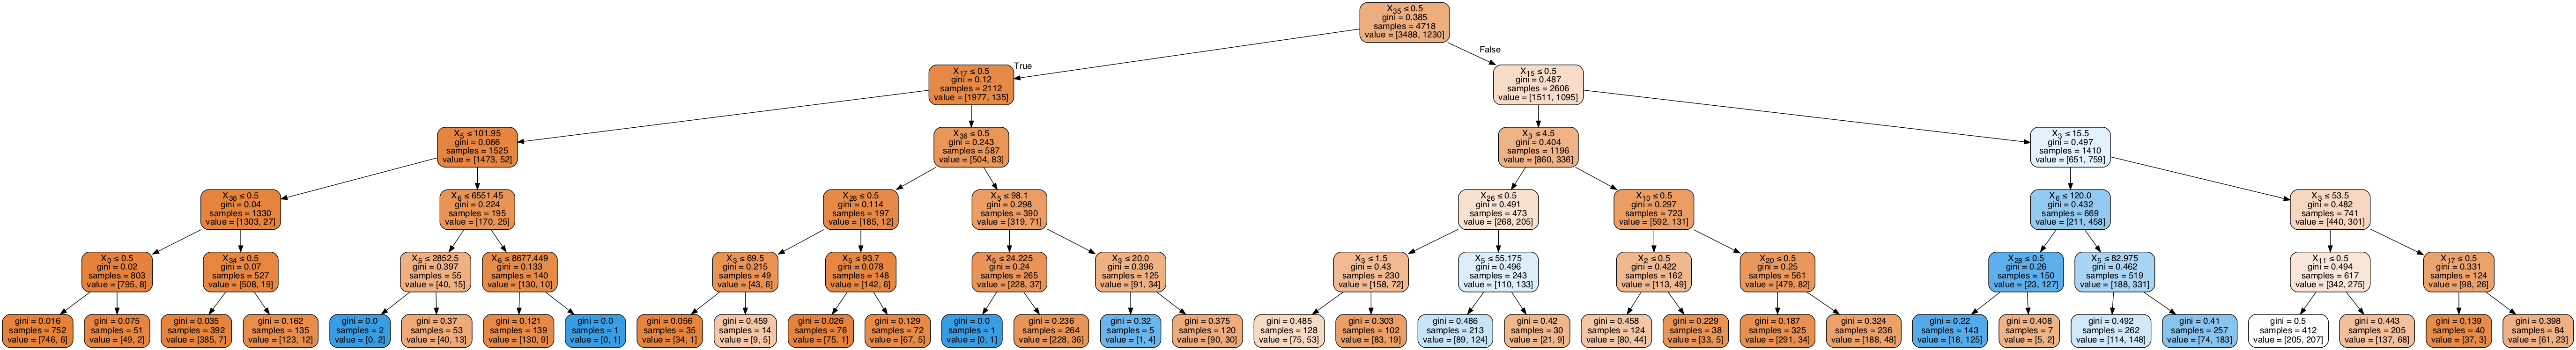

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())